**High-Mountain Asia climate analysis based on gridded observations**

**Katmandhu course, October, 2022**

Topography, temperature


https://github.com/mmenegoz/climate_HMA_course/tree/45d42857d83fbd98cbfda5efb46557ec68ef9100

**1. Environment**

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import os
from tqdm import tqdm

/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.


In [2]:
# Where are the data files?
path="data/"

In [3]:
# Domain study: HMA

lon1, lon2 = 60, 100
lat1, lat2 = 25, 45

In [ ]:
# Domain study: HMA
lon1=60;lon2=110
lat1=25;lat2=45

**2. Open temperature data file (CRU)**

In [4]:
# CRU dataset (https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.06/cruts.2205201912.v4.06/tmp/cru_ts4.06.1901.2021.tmp.dat.nc.gz)
# https://www.nature.com/articles/s41597-020-0453-3
# Here we download only a part of the file
file='HMA_cru_ts4.06.1901.2021.tmp.dat.nc'
ds = xr.open_dataset(os.path.join(path,file))

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 100, time: 1452)
Coordinates:
  * lat      (lat) float32 10.25 10.75 11.25 11.75 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    history:      Wed Oct 19 02:06:39 2022: ncks -O -v tmp HMA_cru_ts4.06.190...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...

In [ ]:
# CRU dataset (https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.06/cruts.2205201912.v4.06/tmp/cru_ts4.06.1901.2021.tmp.dat.nc.gz)
# https://www.nature.com/articles/s41597-020-0453-3
# Here we download only a part of the file
file='HMA_cru_ts4.06.1901.2021.tmp.dat.nc'
ds = xr.open_dataset(os.path.join(path,file))
ds

**3. Extracting regional data and computing seasonal means**

In [6]:
# Extracting the data over HMA

longitudes = slice(lon1, lon2)
lantitudes = slice(lat1, lat2)

temp_HMA = ds.sel(lat=lantitudes,lon=longitudes)
temp_HMA

<xarray.Dataset>
Dimensions:  (lat: 40, lon: 80, time: 1452)
Coordinates:
  * lat      (lat) float32 25.25 25.75 26.25 26.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 98.25 98.75 99.25 99.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    history:      Wed Oct 19 02:06:39 2022: ncks -O -v tmp HMA_cru_ts4.06.190...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...

In [ ]:
# Extracting the data over HMA
longitudes=slice(lon1,lon2)
latitudes=slice(lat1,lat2)
temp_HMA=ds.sel(lat=latitudes,lon=longitudes)
temp_HMA

In [8]:
ds.time

<xarray.DataArray 'time' (time: 1452)>
array(['1901-01-16T00:00:00.000000000', '1901-02-15T00:00:00.000000000',
       '1901-03-16T00:00:00.000000000', ..., '2021-10-16T00:00:00.000000000',
       '2021-11-16T00:00:00.000000000', '2021-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Attributes:
    long_name:  time

In [14]:
ds.time.dt.days_in_month.groupby("time.season")['DJF']

<xarray.DataArray 'days_in_month' (time: 363)>
array([31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28,
       31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31,
       29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31,
       31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28,
       31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31,
       28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31,
       31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29,
       31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31,
       28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31,
       31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28,
       31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31,
       28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31,
       31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28,
       31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31,
       29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31,
       31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28,
       31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31,
       28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31,
       31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29,
       31, 31, 28, 31, 31, 28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31,
       28, 31, 31, 28, 31, 31, 29, 31, 31, 28, 31, 31, 28, 31, 31, 28, 31,
       31, 29, 31, 31, 28, 31])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16

In [16]:
ds.time.dt.days_in_month.groupby("time.season").sum()

<xarray.DataArray 'days_in_month' (season: 4)>
array([10920, 11132, 11132, 11011])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [18]:
import numpy as np

# Define the actual and expected outputs
actual = np.array([1.0, 2.0, 3.0])
desired = np.array([1.0, 2.0, 3.00001])

# Test if the two arrays are almost equal
np.testing.assert_allclose(actual, desired, atol=1e-5, rtol=1e-3)

In [20]:
# function for seasonal mean
def season_mean(ds, calendar="standard"):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = (
        month_length.groupby("time.season") / month_length.groupby("time.season").sum()
    )

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby("time.season").sum(dim="time")

In [21]:
# Computing seasonal mean and ordering properly the seasons
seasonal_mean=season_mean(temp_HMA.tmp).sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

In [22]:
seasonal_mean.shape

(4, 40, 80)

In [23]:
# Levels of temperature for the plot
levels=plot.arange(-34,34,2)

In [25]:
plot.arange(-34,34,2)

array([-34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10,
        -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,  16,
        18,  20,  22,  24,  26,  28,  30,  32,  34])

i=0
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f3540582950> >
i=1
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f35405a19f0> >
i=2
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f3540582f90> >
i=3
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f35405a70e0> >


/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.linewidth' was renamed to grid.linewidth in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.color' was renamed to grid.color in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.alpha' was renamed to grid.alpha in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.linewidth' was renamed to grid.linewidth in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.color' was renamed to grid.color in version 0.6.
/srv/conda/envs/notebo

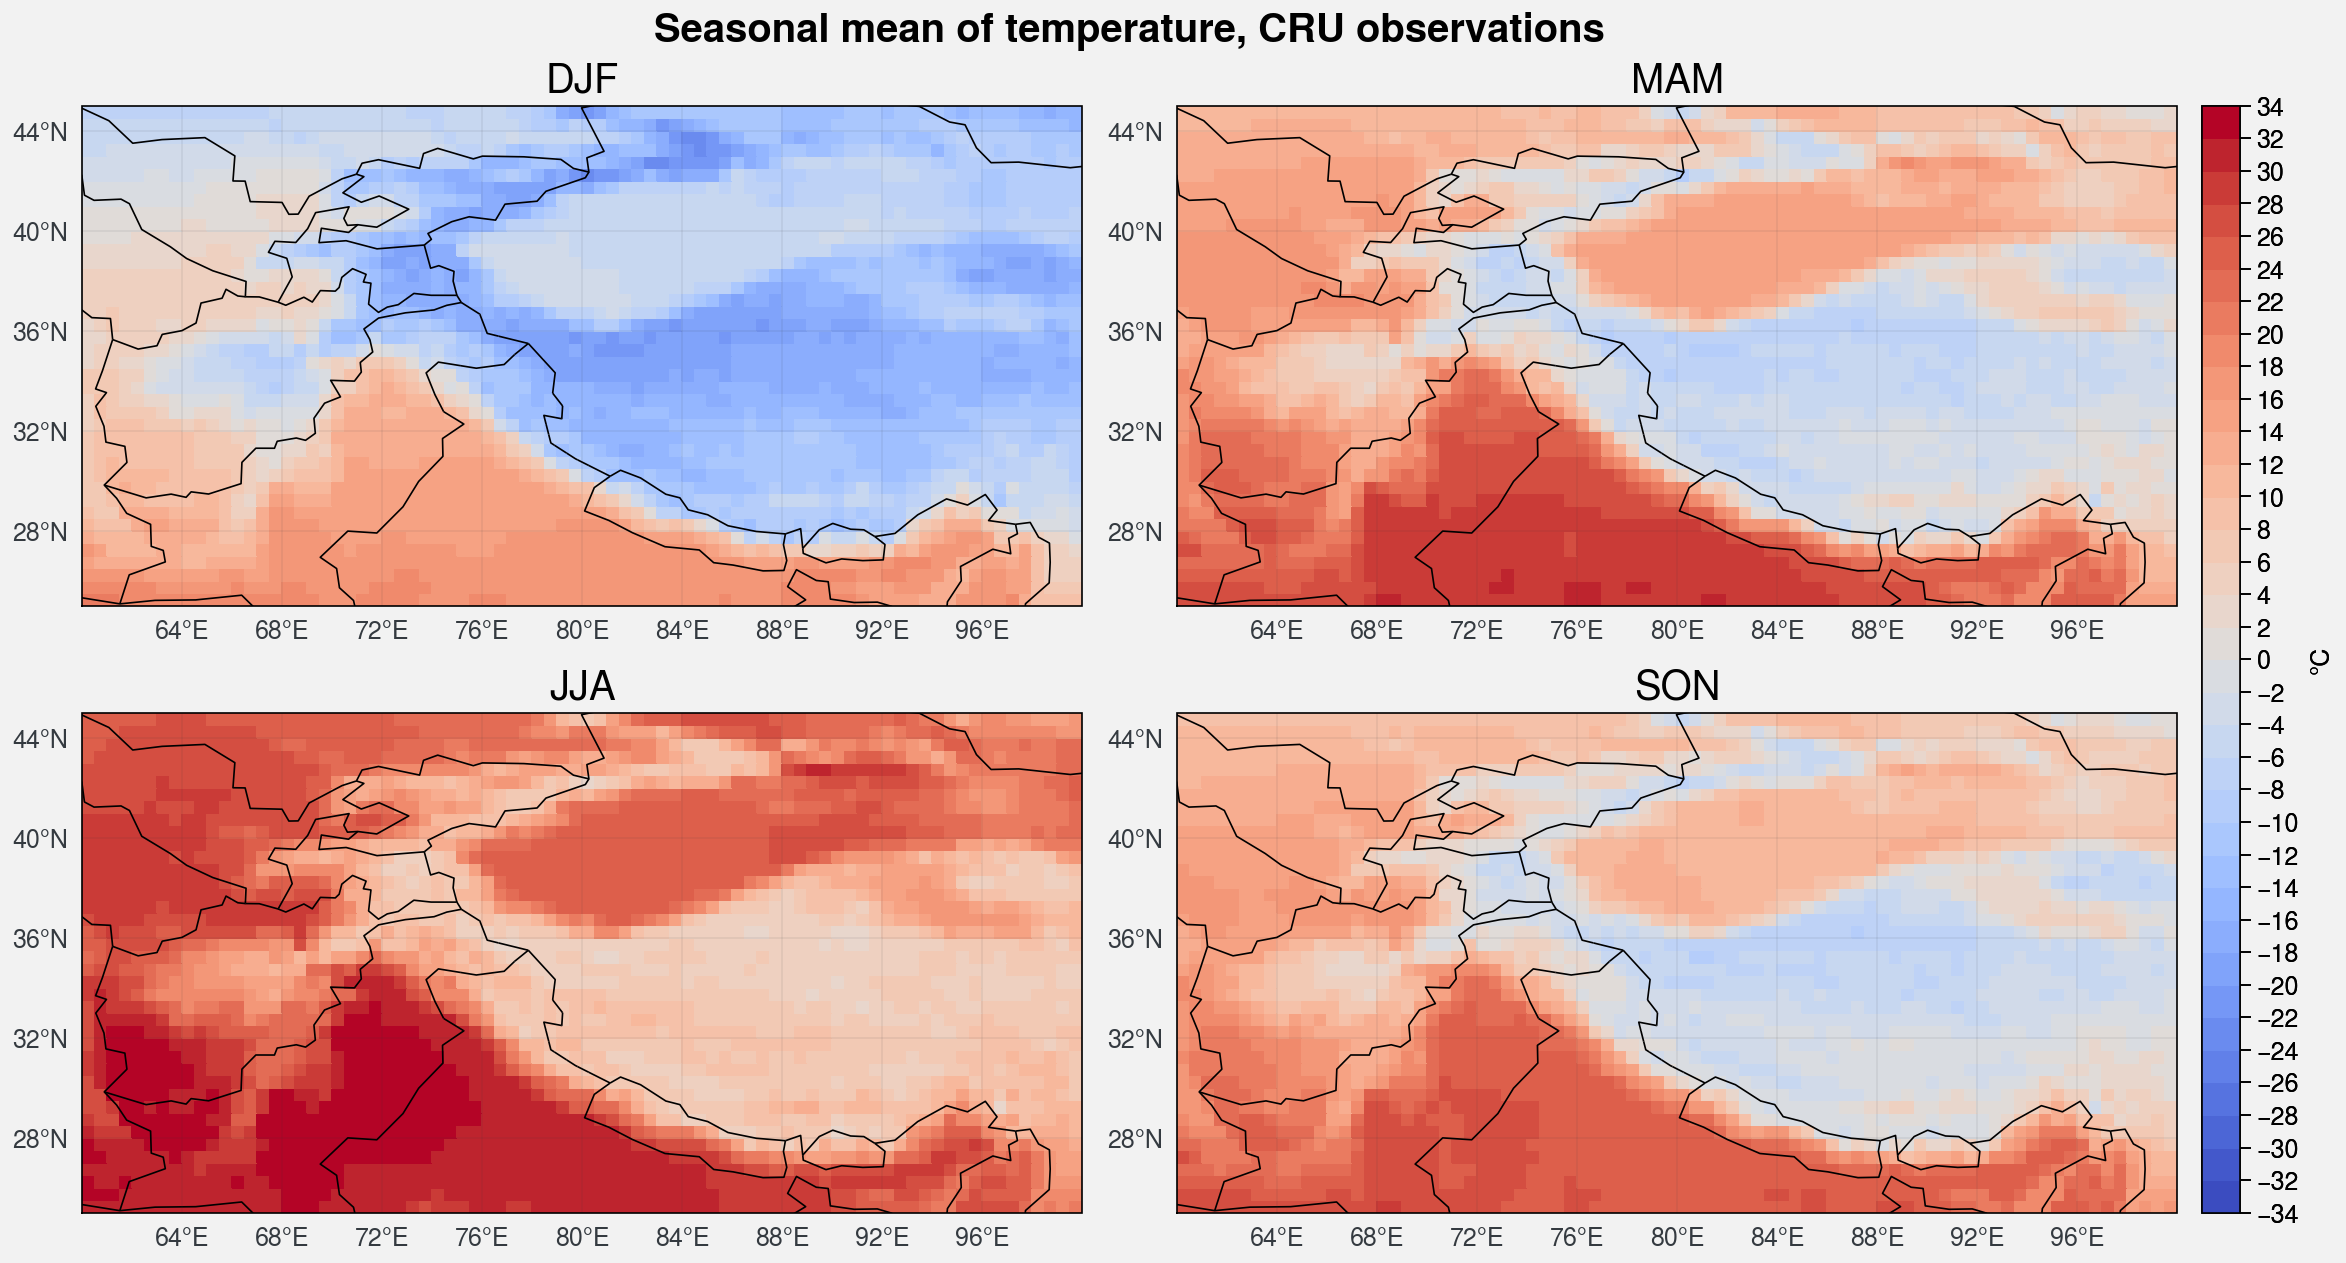

In [24]:
# Producing the map of the seasonal mean, excluding the borders of the domain.
f, axs = plot.subplots(proj='cyl',ncols=2, nrows=2, share=1, axwidth=5)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    m = ax.pcolormesh(
        temp_HMA.lon,temp_HMA.lat,
        seasonal_mean[i,:,:],
        levels=levels,
        cmap='coolwarm'
    )
    ax.format(title=seasonal_mean.season.data[i],large='20px')
    
f.colorbar(m, label= '°C')

axs.format(
    geogridlinewidth=0.1, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=False, oceancolor='gray3', borders=True,
    suptitle="Seasonal mean of temperature, CRU observations",
    lonlines=4, latlines=4, abc=False, latlim=[lat1,lat2],lonlim=[lon1,lon2]
)

**4. Trends**

Choose the period that you want!

In [26]:
# Period over which computing the trends
date1="1901-01"; date2="2021-12"
date3="2022-12" # One year after date2
dates=pd.date_range(start=date1, end=date3, freq='Y')
dates.year

Int64Index([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', length=121)

In [29]:
# Extract seasonal timeseries
Temp = temp_HMA.tmp.sel(time=slice(date1, date2))
Temp

<xarray.DataArray 'tmp' (time: 1452, lat: 40, lon: 80)>
[4646400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 25.25 25.75 26.25 26.75 ... 43.25 43.75 44.25 44.75
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 98.25 98.75 99.25 99.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [ ]:
# Extract seasonal timeseries
Temp=temp_HMA.tmp.sel(time=slice(date1,date2))

**4.1 Check the trend and its level of significance in the location of your choice**

In [30]:
# location study
lon_loc=87; lat_loc=28 # Everest location!!!
#lon_loc=84; lat_loc=28
#lon_loc2=72; lat_loc2=32

In [31]:
# Extraction of the data at the point
temp_loc=Temp.sel(lon=lon_loc, lat=lat_loc, method="nearest")
#temp_loc2=Temp.sel(lon=lon_loc2, lat=lat_loc2, method="nearest")

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


In [32]:
# Creating an empty array with the seasonal data
seasonal_T_loc=np.empty(shape=(int(temp_loc.shape[0]/12),4), dtype=float)
seasonal_T_loc.shape

(121, 4)

In [34]:
Temp['time.year']

<xarray.DataArray 'year' (time: 1452)>
array([1901, 1901, 1901, ..., 2021, 2021, 2021])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16

In [35]:
# Seasonal spatial data
seasonal_T_loc [:,0] = temp_loc.where(Temp['time.season'] == 'DJF').groupby('time.year').mean(dim='time')
seasonal_T_loc [:,1] = temp_loc.where(Temp['time.season'] == 'MAM').groupby('time.year').mean(dim='time')
seasonal_T_loc [:,2] = temp_loc.where(Temp['time.season'] == 'JJA').groupby('time.year').mean(dim='time')
seasonal_T_loc [:,3] = temp_loc.where(Temp['time.season'] == 'SON').groupby('time.year').mean(dim='time')

In [36]:
# Seasonal spatial data
seasonal_T_loc

array([[-10.46666622,  -1.60000002,   8.4333334 ,  -0.20000012],
       [ -9.5666666 ,  -1.4333334 ,   7.76666641,  -0.83333349],
       [-10.26666737,  -1.63333321,   8.03333378,  -0.4000001 ],
       [ -9.86666775,  -1.83333337,   7.33333349,  -0.69999999],
       [-11.03333282,  -3.26666665,   7.9000001 ,  -0.26666674],
       [-10.23333359,  -1.83333337,   7.63333368,  -0.13333337],
       [ -9.80000019,  -3.        ,   7.86666679,  -0.0666666 ],
       [-10.26666641,  -0.83333331,   7.96666718,  -0.46666655],
       [ -9.66666698,  -1.53333318,   7.0999999 ,   0.26666674],
       [-10.13333416,  -1.79999983,   7.10000038,  -0.63333321],
       [ -9.96666622,  -2.10000014,   7.63333321,  -0.9666667 ],
       [ -9.66666698,  -2.33333325,   7.60000038,  -0.73333341],
       [-10.03333378,  -2.4333334 ,   7.06666708,  -0.63333321],
       [ -9.46666718,  -2.36666679,   7.4666667 ,  -0.86666673],
       [ -9.53333282,  -1.86666679,   7.66666651,   0.5333333 ],
       [-10.0666666 ,  -0

In [37]:
np.full(seasonal_T_loc.shape[1:4],np.nan)

array([nan, nan, nan, nan])

In [38]:
# Computing trends
slope_T_loc=np.full(seasonal_T_loc.shape[1:4],np.nan)
pvalue_T_loc=np.full(seasonal_T_loc.shape[1:4],np.nan)
intercept_T_loc=np.full(seasonal_T_loc.shape[1:4],np.nan)
for season in range(4):
    linregress_T_loc = stats.linregress(range(seasonal_T_loc.shape[0]-1), seasonal_T_loc[1:,season])
    slope_T_loc[season] = linregress_T_loc.slope
    intercept_T_loc[season] = linregress_T_loc.intercept
    pvalue_T_loc[season] = linregress_T_loc.pvalue

In [39]:
seasonal_T_loc.shape

(121, 4)

In [40]:
index=np.arange(0,dates.shape[0])
index.shape

(121,)

In [41]:
pvalue_T_loc

array([1.03026387e-13, 9.57249977e-06, 4.25665274e-07, 6.85767836e-13])

i=0
ax=CartesianAxesSubplot(0.10967,0.542451;0.424528x0.413034)
i=1
ax=CartesianAxesSubplot(0.564858,0.542451;0.424528x0.413034)
i=2
ax=CartesianAxesSubplot(0.10967,0.065397;0.424528x0.413034)
i=3
ax=CartesianAxesSubplot(0.564858,0.065397;0.424528x0.413034)


/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.


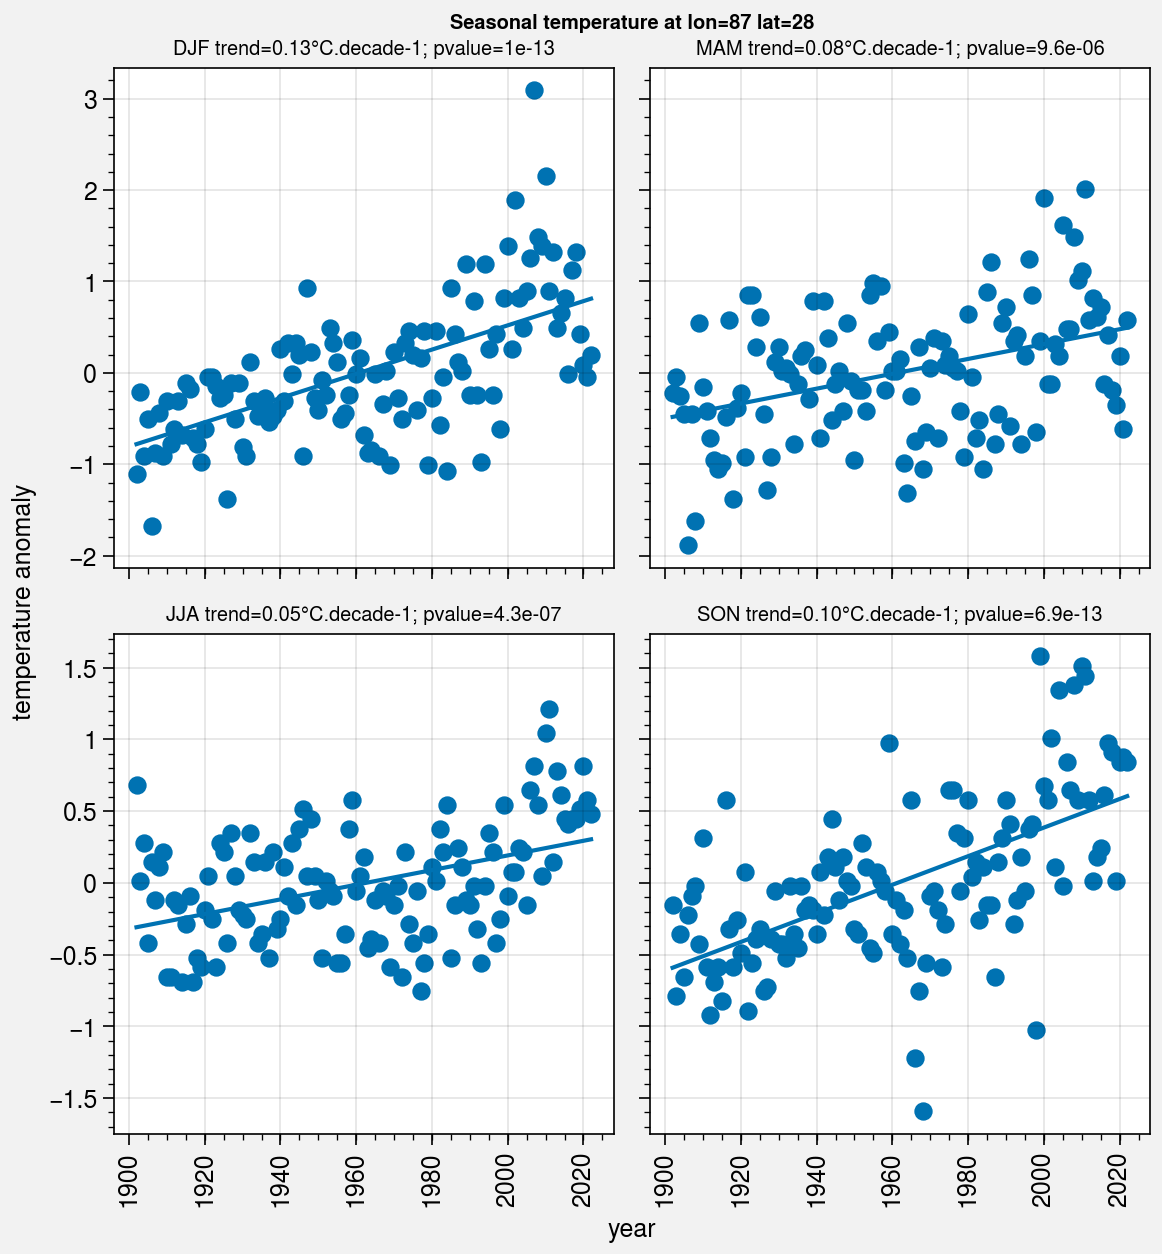

In [42]:
#Plotting temperature timeseries
f, axs = plot.subplots(ncols=2, nrows=2)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    if pvalue_T_loc[i]<0.05:
        signif='solid'
    else:
        signif='dashed'
    m = ax.scatter(dates,seasonal_T_loc[:,i]-np.mean(seasonal_T_loc[:,i]))
    m = ax.plot(dates,intercept_T_loc[i]+slope_T_loc[i]*index-np.mean(seasonal_T_loc[:,i]),linestyle=signif)
    ax.format(title=f"{seasonal_mean.season.data[i]} trend={slope_T_loc[i]*10:.2f}°C.decade-1; pvalue={pvalue_T_loc[i]:.2g}",large='10px')
    #ax.format(title=seasonal_mean.season.data[i]+' trend='+str(round(slope_T_loc[i]*10,2))+'°C.decade-1; '+'pvalue='+str(round(pvalue_T_loc[i],3)),large='10px')

axs.format(
    suptitle='Seasonal temperature at lon='+str(lon_loc)+' lat='+str(lat_loc),
    xlabel='year',
    ylabel='temperature anomaly'
)

**4.2. HMA trend maps**

In [43]:
# Getting the total number of years
int(Temp.shape[0]/12)

121

In [44]:
# Creating an empty array with the total seasonal data
seasonal_T=np.empty(shape=(int(Temp.shape[0]/12),4,Temp.shape[1],Temp.shape[2]), dtype=float)
seasonal_T.shape

(121, 4, 40, 80)

In [45]:
Temp.where(Temp['time.season'] == 'DJF').groupby('time.year').mean(dim='time').shape

(121, 40, 80)

In [46]:
# Seasonal spatial data
seasonal_T [:,0,:,:] = Temp.where(Temp['time.season'] == 'DJF').groupby('time.year').mean(dim='time')
seasonal_T [:,1,:,:] = Temp.where(Temp['time.season'] == 'MAM').groupby('time.year').mean(dim='time')
seasonal_T [:,2,:,:] = Temp.where(Temp['time.season'] == 'JJA').groupby('time.year').mean(dim='time')
seasonal_T [:,3,:,:] = Temp.where(Temp['time.season'] == 'SON').groupby('time.year').mean(dim='time')

In [56]:
# Computing trends
slope_T=np.full(seasonal_T.shape[1:4],np.nan)
pvalue_T=np.full(seasonal_T.shape[1:4],np.nan)

for lon in tqdm(range(80)):
    for lat in range(seasonal_T.shape[2]):
        for season in range(4):
            linregress_T = stats.linregress(range(seasonal_T.shape[0]-1), seasonal_T[1:,season,lat,lon])
            slope_T[season][lat][lon] = linregress_T.slope
            pvalue_T[season][lat][lon] = linregress_T.pvalue

100%|██████████| 80/80 [00:02<00:00, 37.42it/s]


In [57]:
# Masking non-significative signals
signif=np.where(pvalue_T<0.05,True,False)

In [58]:
# Levels of temperature for the plot
levels=plot.arange(-0.3,0.3,0.05)
factor=10 # degree per decade

i=0
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f3540658a90> >
i=1
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f35325df3b0> >
i=2
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f3540658630> >
i=3
ax=< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f35406583b0> >


/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.linewidth' was renamed to grid.linewidth in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.color' was renamed to grid.color in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.alpha' was renamed to grid.alpha in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.linewidth' was renamed to grid.linewidth in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'geogrid.color' was renamed to grid.color in version 0.6.
/srv/conda/envs/notebo

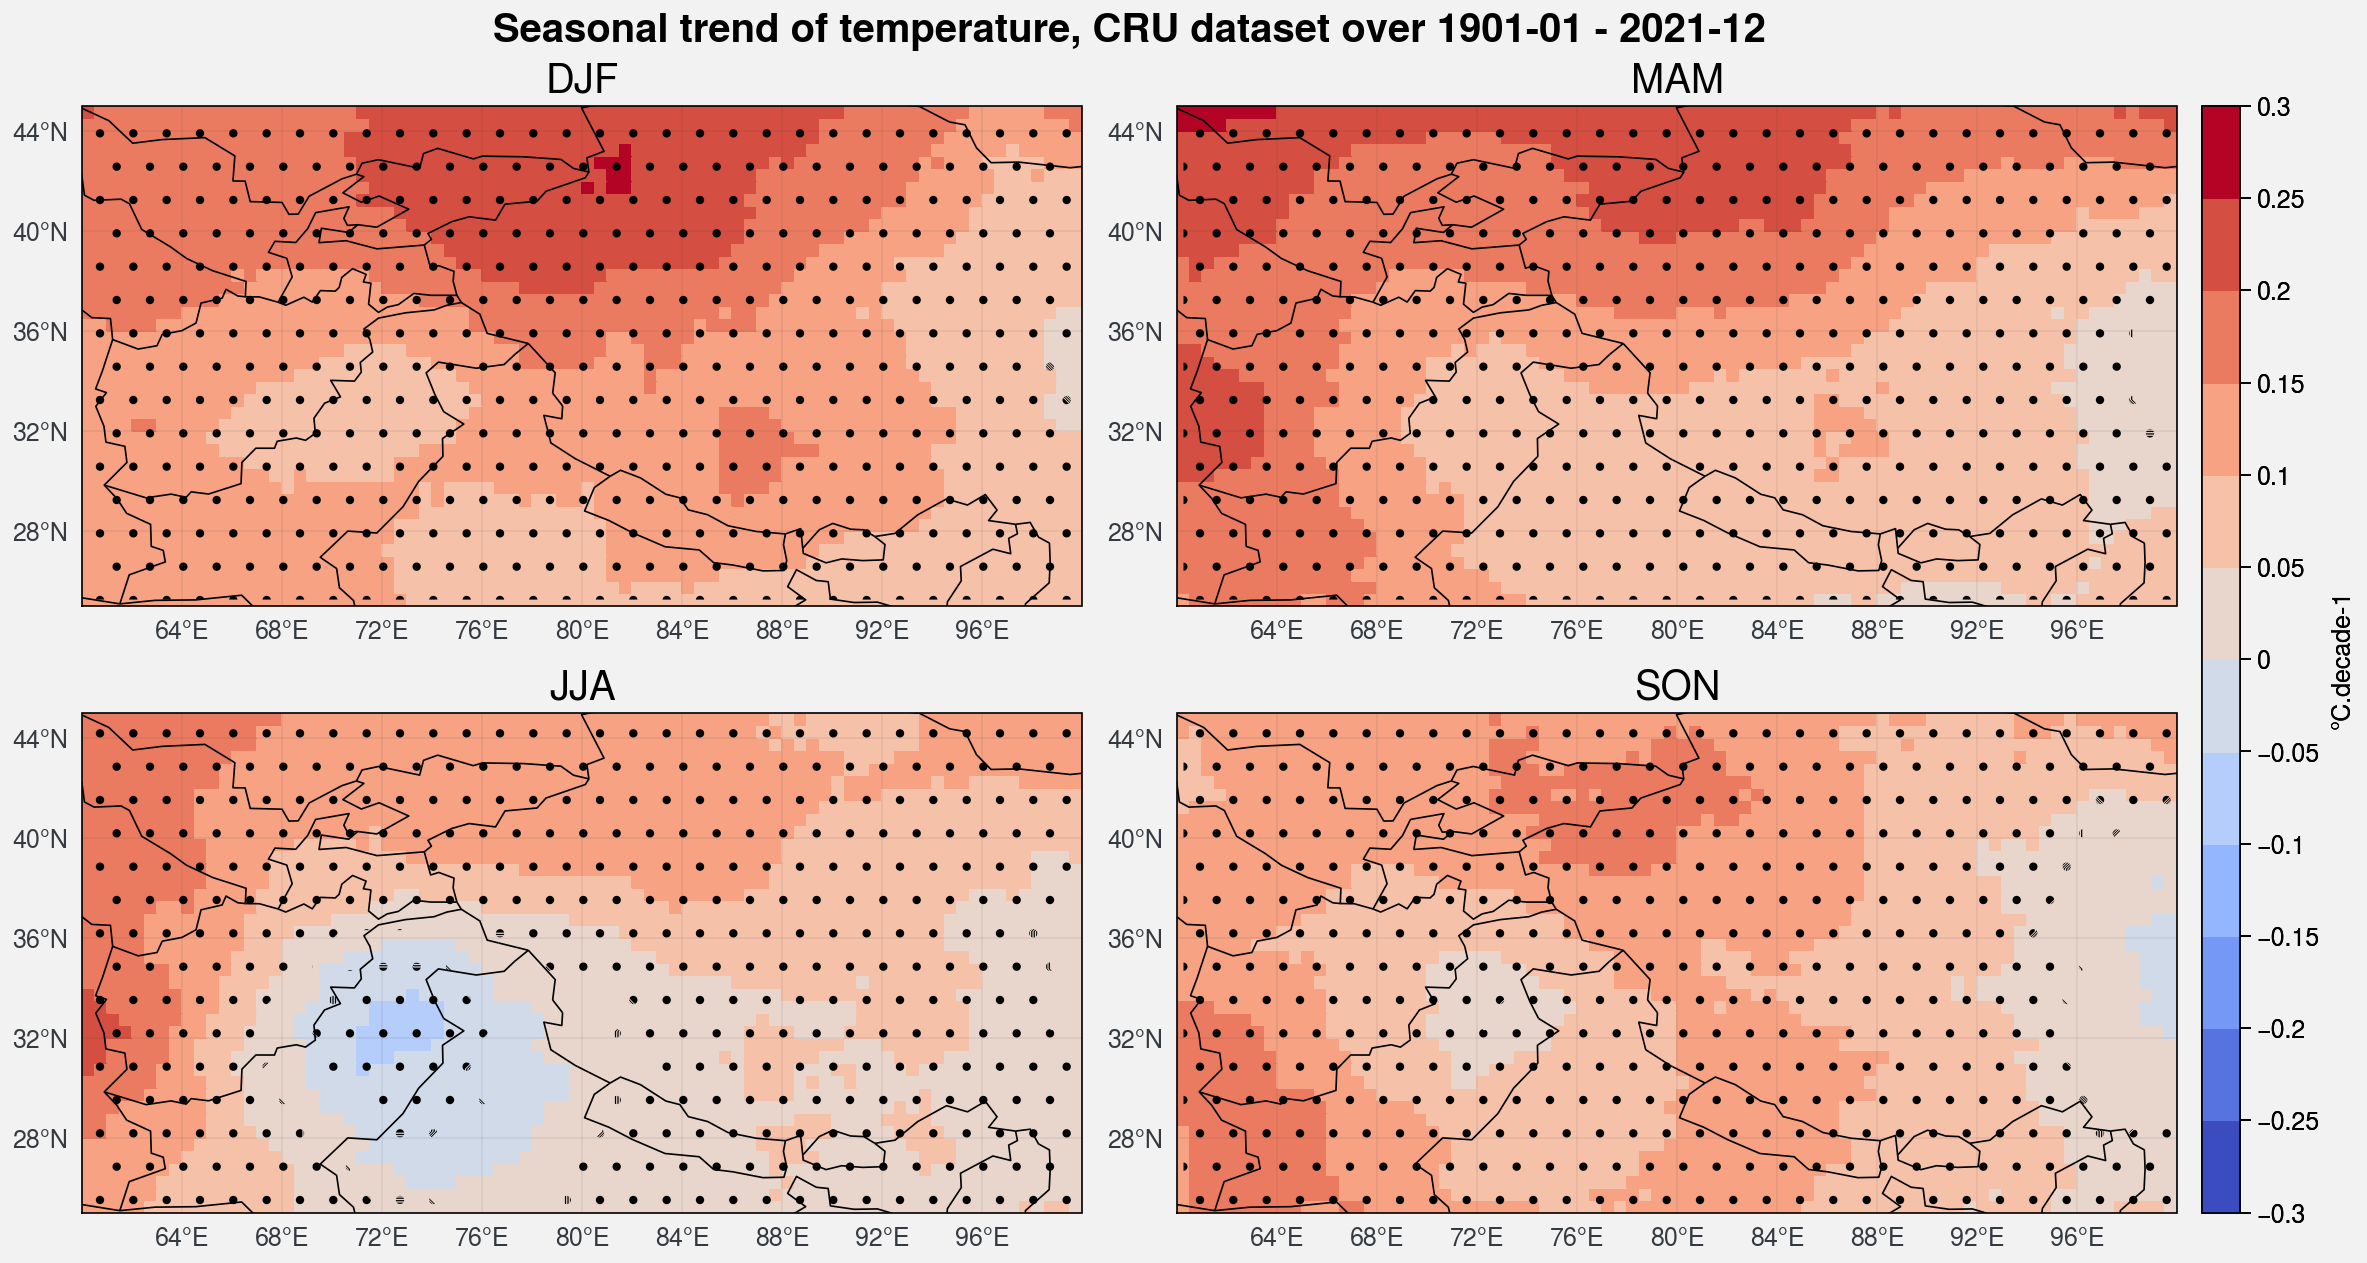

In [59]:
# Producing the map of the trends, excluding the borders of the domain.
f, axs = plot.subplots(proj='cyl',ncols=2, nrows=2, share=1, axwidth=5)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    m = ax.pcolormesh(
        temp_HMA.lon,temp_HMA.lat,
        slope_T[i,:,:]*factor,
        levels=levels,
        cmap='coolwarm'
    )
    ax.format(title=seasonal_mean.season.data[i],large='20px')
    
    p = ax.contourf(
    temp_HMA.lon,temp_HMA.lat,
    signif[i,:,:],
    hatches=["", "."], alpha=0
    )
    
f.colorbar(m, label= '°C.decade-1')

axs.format(
    geogridlinewidth=0.1, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=False, oceancolor='gray3', borders=True,
    suptitle="Seasonal trend of temperature, CRU dataset over "+date1+" - "+date2,
    lonlines=4, latlines=4, abc=False, latlim=[lat1,lat2],lonlim=[lon1,lon2]
)

**Now, you can invent your own analysis, e.g:**
* Computing trends where you want and over any period.
* Computing trends as a function of the elevation using the topography in the file below.
* Etc...


In [60]:
# Topography at 0.25° (http://research.jisao.washington.edu/data_sets/elevation/)
# -> 0.25-degree latitude-longitude resolution elevation (TBASE)
file_topo="elev.0.25-deg.nc"
ds_topo = xr.open_dataset(os.path.join(path,file_topo))
ds_topo # ds_topo as dataset

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates o

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat      (lat) float32 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) object 0001-01-01 00:00:00
Data variables:
    data     (time, lat, lon) float32 ...
Attributes:
    history:  \nElevations calculated from the TBASE 5-minute\nlatitude-longi...

In [61]:
# Extracting the data over HMA
# be careful to reversed latitudes in the original file
topo_HMA=ds_topo.isel(time=0).sel(lon=slice(lon1,lon2),lat=slice(lat2,lat1))

Text(0.5, 1.0, 'Topography TBASE with a 0.25° resolution')

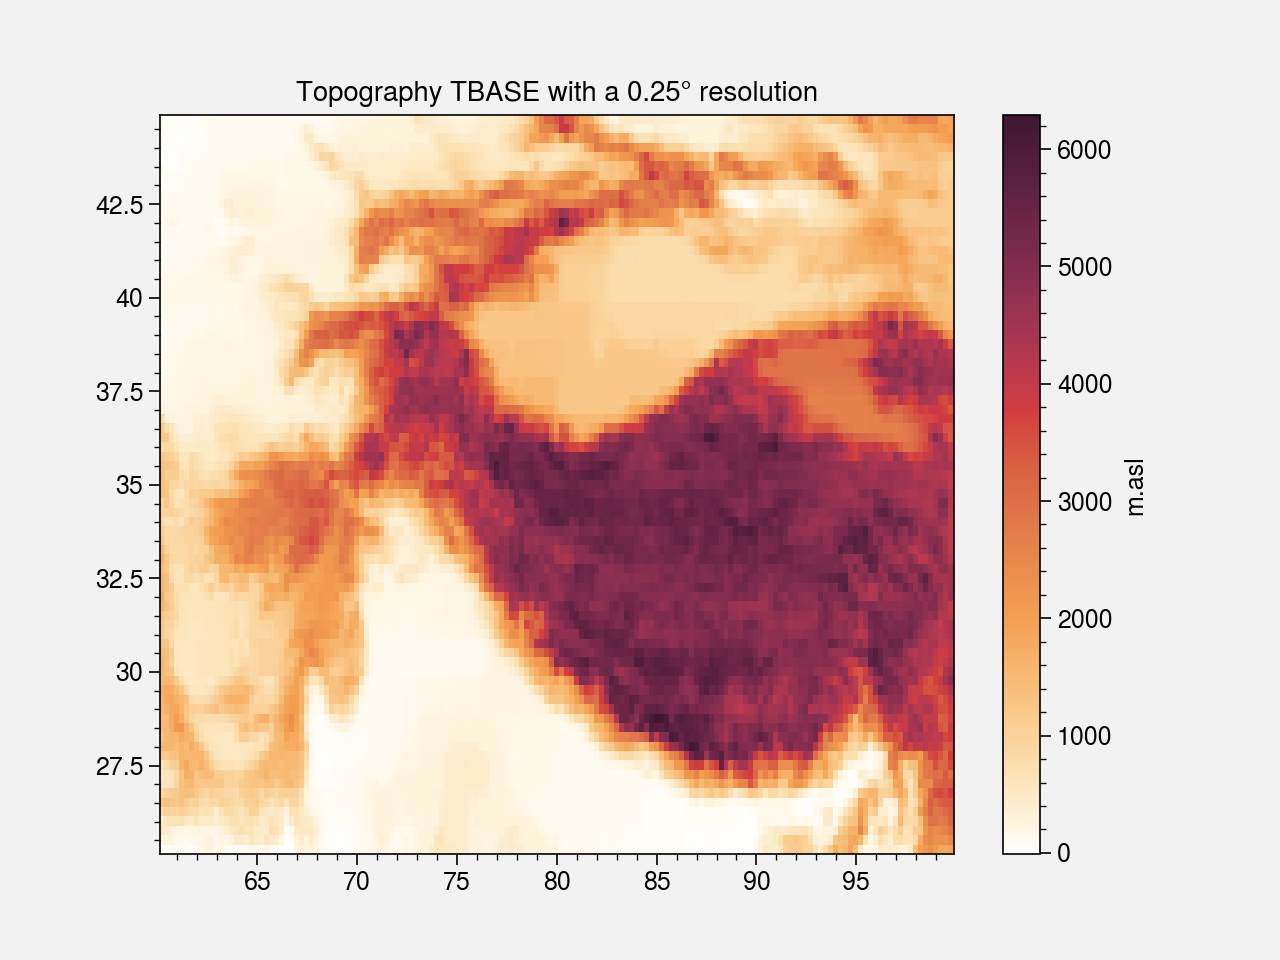

In [62]:
fig, ax = plt.subplots()
m=ax.pcolormesh(topo_HMA.lon,topo_HMA.lat,topo_HMA.data)
fig.colorbar(m,label= 'm.asl')
ax.set_title('Topography TBASE with a 0.25° resolution')

In [63]:
# Interpolation of the topography on the CRU grid
ds_topo_HMA_out=topo_HMA.interp(lat=temp_HMA.lat,lon=temp_HMA.lon)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is depreca

Text(0.5, 1.0, 'Topography TBASE interpolated on a 0.5° resolution')

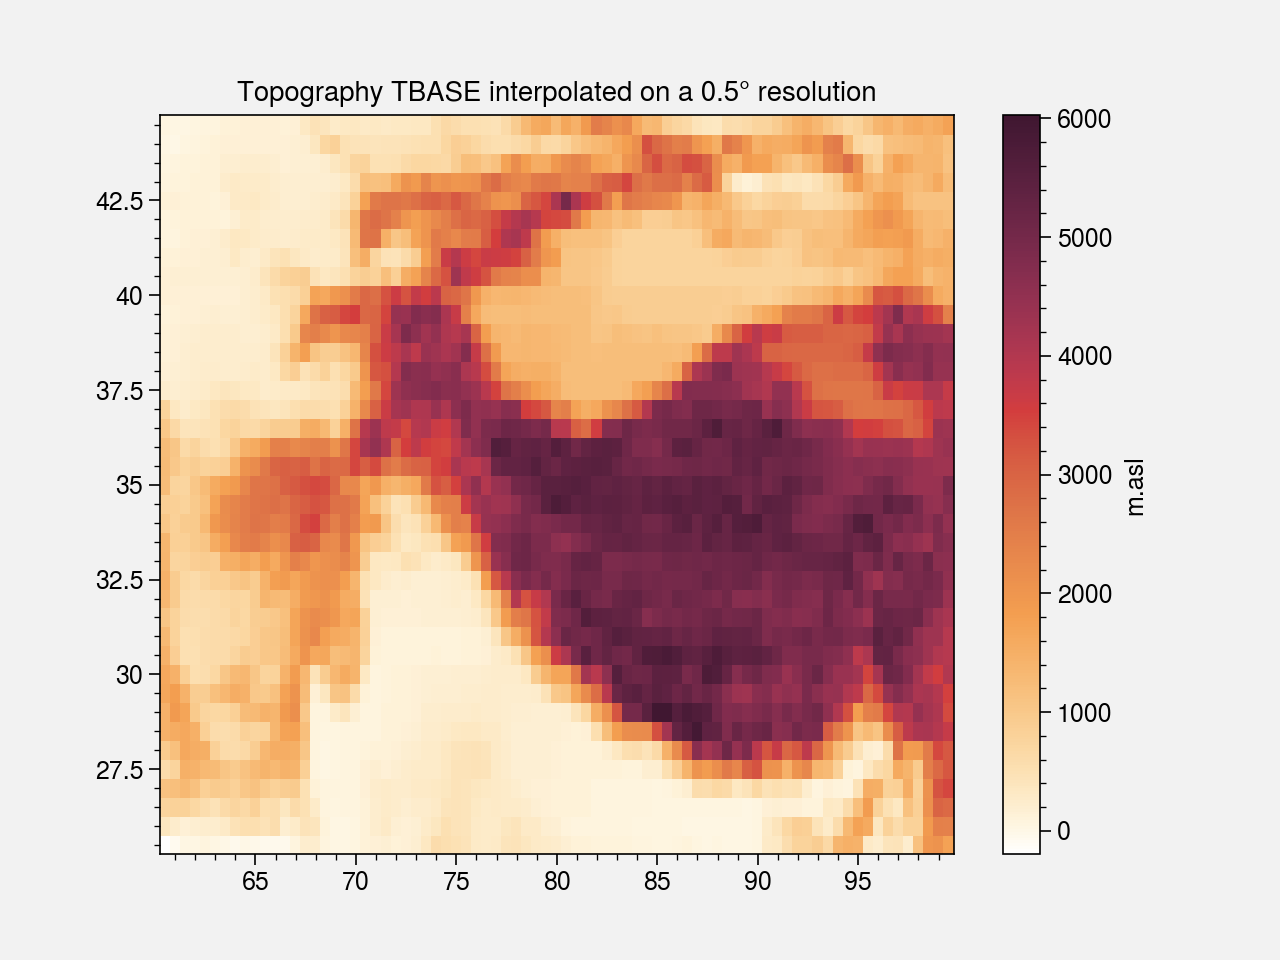

In [64]:
fig, ax = plt.subplots()
m=ax.pcolormesh(ds_topo_HMA_out.lon,ds_topo_HMA_out.lat,ds_topo_HMA_out.data)
fig.colorbar(m,label= 'm.asl')
ax.set_title('Topography TBASE interpolated on a 0.5° resolution')

In [65]:
# Levels of temperature for the plot
#levels=np.arange(-0.5,0.5,0.05)
factor_trend=10 # degree per decade
bins=100
levels=np.logspace(0,1,25)

In [66]:
# We keep only the elevation area > limit m.asl
limit=1000
topo_high=ds_topo_HMA_out.data.where(ds_topo_HMA_out.data > limit)
trends_high=np.zeros(slope_T.shape)
for i in np.arange(4):
    trends_high[i,:,:]=np.where(ds_topo_HMA_out.data > limit,slope_T[i,:,:],np.nan)

i=0
ax=CartesianAxesSubplot(0.102649,0.553715;0.397351x0.402865)
i=1
ax=CartesianAxesSubplot(0.592715,0.553715;0.397351x0.402865)
i=2
ax=CartesianAxesSubplot(0.102649,0.0637869;0.397351x0.402865)


/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.


i=3
ax=CartesianAxesSubplot(0.592715,0.0637869;0.397351x0.402865)


/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/srv/conda/envs/notebook/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.


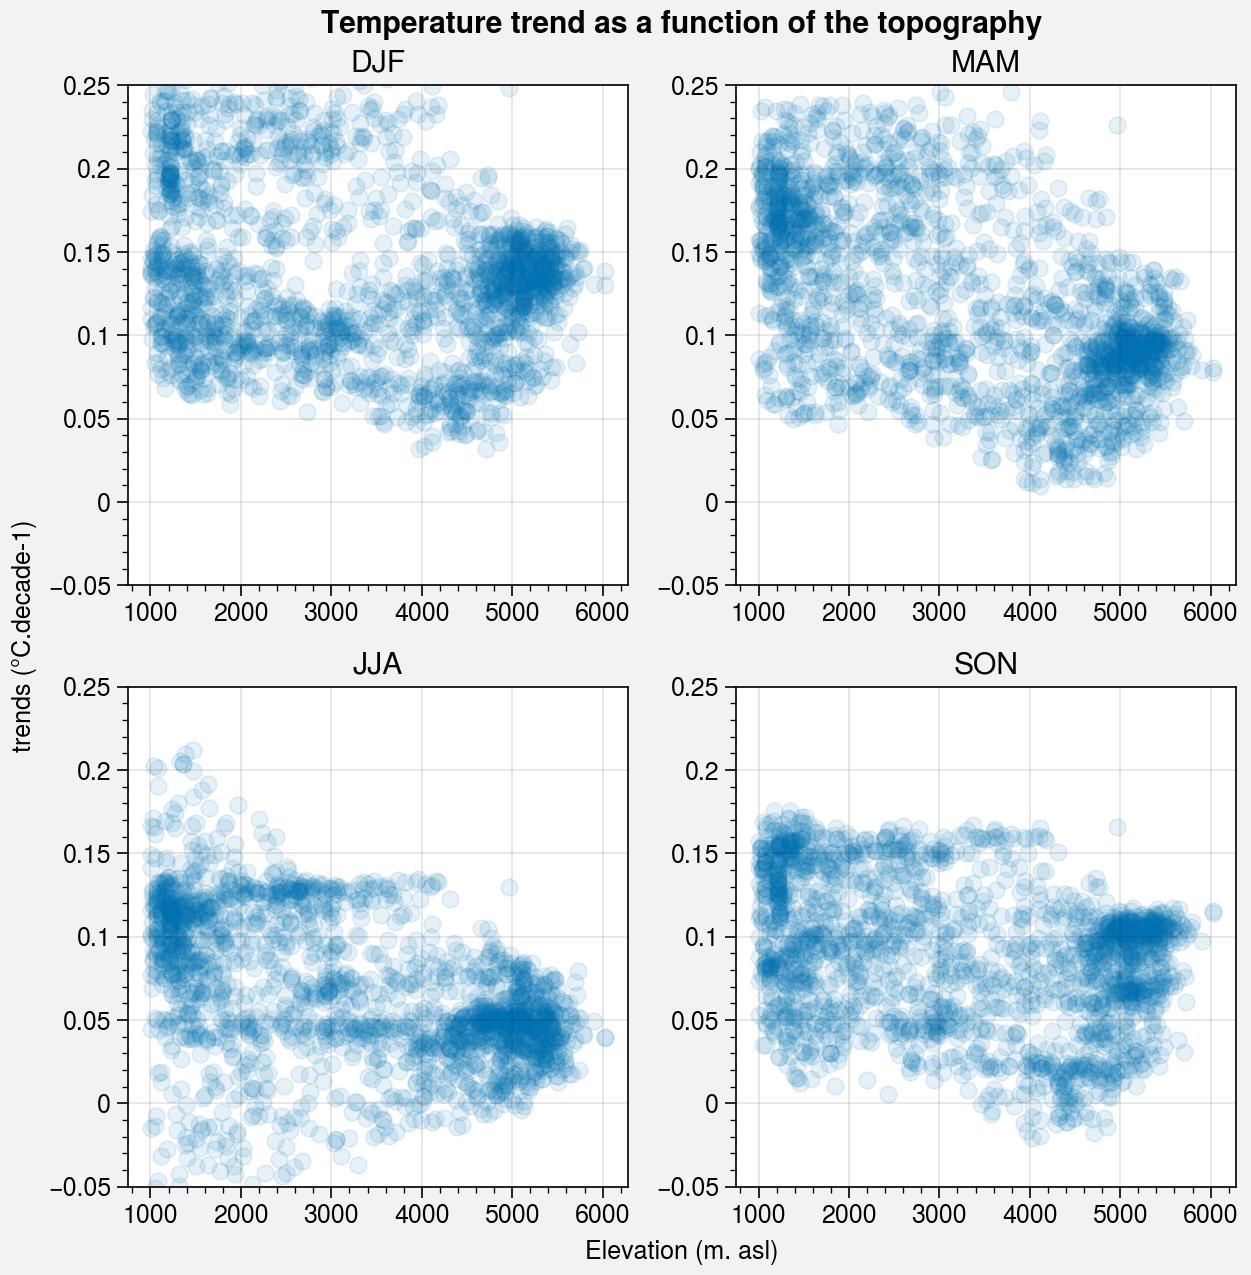

In [67]:
#Plotting trends as a function of elevation
f, axs = plot.subplots(ncols=2, nrows=2,share=1)
for i, ax in enumerate(axs):
    print('i='+str(i))
    print('ax='+str(ax))
    m = ax.scatter(topo_high.values.flatten(),trends_high[i,:,:].flatten()*factor_trend,alpha=0.1)
    #m = ax.hist2d(topo_high.values.flatten(),trends_high[i,:,:].flatten()*factor_trend,bins=bins,cmap='Spectral_r',levels=levels,cmin=1)
    #m = ax.hist2d(ds_topo_HMA_out.data.values.flatten(),slope_T[i,:,:].flatten()*factor_trend,bins=bins,cmap='Spectral_r',levels=levels,cmin=1)
    #m = ax.scatter(ds_topo_HMA_out.data,slope_T[i,:,:]*factor_trend,alpha=0.1)
    ax.format(title=seasonal_mean.season.data[i],large='15px',ylim=(-0.05,0.25))

    #f.colorbar(m[3],ticks=np.logspace(0,1,2))    

axs.format(
    suptitle='Temperature trend as a function of the topography',
    xlabel='Elevation (m. asl)',
    ylabel='trends (°C.decade-1)',
    large='15px'
)